### v3:
####-improved plotting shows RT within tolerance, fixes background coloring
####-saves paradigm parameters, but doesn't include summary variables derived from the main info:
#####       -reversal, post_err, score_total, hit_total, block_acc

In [1]:
%matplotlib inline
import sys 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io as io

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
SBJ = 'IR63'

results_dir = '/Users/colinhoy/Code/PRJ_Error/results/'
fig_type = '.png'
log_dir = '/Users/colinhoy/Code/PRJ_Error/logs/'
data_dir = '/Users/colinhoy/Code/PRJ_Error/data/'
logs = {'Rana_1.6': 'Rana2_response_log_20170321103129_DATA.txt',
        'Adi_1.7': 'adi_response_log_20170321153641.txt',
        'IR57': '857_response_log_20170322112243_CWHedit.txt',#CWHedit added n_training, n_examples lines
        'IR60': '60_response_log_20170613100307.txt',
        'IR62': 'ir62_response_log_20170713124719.txt',
        'IR63': 'IR63_response_log_20170921095757.txt',
        'IR65': '865_response_log_20171207130759.txt',
        'BP1': 'Pilot1_2_response_log_20170412131644.txt',
        'BP2': 'pilot2_response_log_20170412140615.txt',
        'BP3': 'pilot3_response_log_20170413110228.txt',
        'BP4': 'Pilot4_2_response_log_20170418140941.txt',
        'BP5': 'colin_real_response_log_20170412103113.txt',
        'BP6': 'pilot_adi_response_log_20170414122257.txt',
        'BP7': 'pilot_Rana_response_log_20170415155844.txt',
        'BP8': 'Giao_response_log_20170419161340.txt',
        'BP9': 'Sundberg_response_log_20170419150222.txt',
        'CP22': '222_response_log_20170609140407.txt',
        'CP23': '223_response_log_20170930123015.txt',
        'CP241': '224-1_response_log_20171206121023.txt',
        'CP242': 'cp24_2_response_log_20171209120902.txt',
        'colin_vec': 'colin_circle_wVec_response_log_20171222141248.txt',
        'colin_novec': 'colin_noVec_response_log_20171222142110.txt',
        'Griffith_vec': 'Griffith_wMarker_response_log_20180107180428.txt',
        'Griffith_novec': 'Griffith_nMarker_response_log_20180107182959.txt',
        'Rana_vec': 'rana_vec_4real_response_log_20180118130130.txt',
        'Rana_novec': 'rana_noVec_response_log_20180118123831.txt',
        'Sheila_vec': 'sheila_vec_response_log_20180119105858.txt',
        'Sheila_novec': 'sheila_novec_response_log_20180119111741.txt'
       }

### Load SBJ Data

In [3]:
log_filename = os.path.join(data_dir,SBJ,logs[SBJ])

log_file = open(log_filename,'r')
log = log_file.readlines()
log_file.close()

### Process Version-Specific Parameters

In [4]:
prdm_vars = {'timing': {},
               'design': {}}
for line in log:
    # Script version
    if line.find('paradigm_name =')!=-1:
        prdm_vars['prdm_name'] = line[line.find('= ')+2:line.find('\n')]
    if line.find('paradigm_version =')!=-1:
        prdm_vars['prdm_version'] = line[line.find('= ')+2:line.find('\n')]

    # Timing variables
    if line.find('interval_dur =')!=-1:
        prdm_vars['timing']['target'] = float(line[line.find('= ')+2:line.find('\n')])
    if line.find('feedback_delay =')!=-1:
        prdm_vars['timing']['fb_delay'] = float(line[line.find('= ')+2:line.find('\n')])
    if line.find('feedback_dur =')!=-1:
        prdm_vars['timing']['fb'] = float(line[line.find('= ')+2:line.find('\n')])
    
    # ITIs and boundaries between them
    if line.find('ITIs')!=-1:
        prdm_vars['timing']['ITIs'] = [float(string) \
                    for string in line[line.find('[')+1:line.find(']')].split(',')]
        ITI_bounds = np.mean([prdm_vars['timing']['ITIs'][:-1], prdm_vars['timing']['ITIs'][1:]],0)
        
    # Tolerance limits/clamps
    if line.find('tolerance_lim')!=-1:
        prdm_vars['timing']['tol_lim'] = [float(string) \
                         for string in line[line.find('[')+1:line.find(']')].split(',')]
        
    # Trial count variables
    if line.find('n_blocks')!=-1:
        prdm_vars['design']['n_blocks'] = int(line[line.find('=')+2:])
    if line.find('n_trials')!=-1:
        prdm_vars['design']['n_trials'] = int(line[line.find('=')+2:])
    if line.find('n_examples')!=-1:
        prdm_vars['design']['n_fullvis'] = int(line[line.find('=')+2:])
    if line.find('n_fullvis')!=-1:
        prdm_vars['design']['n_fullvis'] = int(line[line.find('=')+2:])
    if line.find('n_training')!=-1:
        prdm_vars['design']['n_training'] = int(line[line.find('=')+2:])

prdm_vars['timing']['trl_len'] = prdm_vars['timing']['target']+\
            prdm_vars['timing']['fb_delay']+prdm_vars['timing']['fb']

### Save paradigm parameters

In [5]:
prdm_filename = os.path.join(data_dir,SBJ,SBJ+'_prdm_vars.mat')
io.savemat(prdm_filename,prdm_vars)

In [6]:
print 'paradigm: ', prdm_vars['prdm_name'], ' v', prdm_vars['prdm_version']
print
print 'interval: ', prdm_vars['timing']['target'], 's'
print 'feedback_delay: ', prdm_vars['timing']['fb_delay'], 's'
print 'feedback duration: ', prdm_vars['timing']['fb'], 's'
print 'total trial length: ', prdm_vars['timing']['trl_len'], 's'
print
print 'n_blocks (per condition): ', prdm_vars['design']['n_blocks']
print 'n_trials/block: ', prdm_vars['design']['n_trials']
print 'n_fullvis: ', prdm_vars['design']['n_fullvis']
print 'n_training/condition: ', prdm_vars['design']['n_training']
print
# ITI_bounds = [np.mean(a,b) for a, b in zip(ITIs[:-1],ITIs[1:])]
print 'ITIs:',prdm_vars['timing']['ITIs'], ITI_bounds
print 'tolerance_lim:', prdm_vars['timing']['tol_lim']

paradigm:  target_time  v 1.8.7

interval:  1.0 s
feedback_delay:  0.8 s
feedback duration:  0.8 s
total trial length:  2.6 s

n_blocks (per condition):  2
n_trials/block:  75
n_fullvis:  5
n_training/condition:  15

ITIs: [0.2, 0.4, 0.7, 1.0] [ 0.3   0.55  0.85]
tolerance_lim: [0.2, 0.015]


### Extract Trial Info

In [9]:
resp_lines = [line for line in log if line.find('Outcome=')!=-1]
data = pd.DataFrame({'Block': [line[line.find('B')+1] for line in resp_lines],
                     'Trial': [int(line[line.find('_T')+2:line.find(':')]) for line in resp_lines],
                     'Condition': [line[line.find('_type')+8:line.find('_type')+12] for line in resp_lines],
                     'Hit': [line.count('WIN') for line in resp_lines],
                     'RT': [line[line.find('RT')+5:line.find('RT')+5+13].strip() for line in resp_lines],
                     'Tolerance': [float(line[line.find('tol')+12:line.find('\n')]) for line in resp_lines],
                     'Timestamp': [float(line[:line.find('.')+4]) for line in resp_lines],
                     'Valid': [True for _ in range(len(resp_lines))]})
data['Score'] = [100 if data['Hit'][ix]==1 else -100 for ix in range(len(data))]

In [10]:
# Calculate ITIs
data['ITI'] = [data['Timestamp'][ix]-data['Timestamp'][ix-1]-prdm_vars['timing']['trl_len'] if ix!=0 else 0 \
               for ix in range(len(data))]
data.loc[data['Trial']==0,'ITI'] = 0
data.loc[data['Block']==-1,'ITI'] = 0
if len(prdm_vars['timing']['ITIs'])==4:    # target_time v1.8.5+
    data['ITI type'] = ['short' if data['ITI'][ix]<0.5 else 'long' for ix in range(len(data))]
    ITI_plot_order = ['short','long']
elif len(prdm_vars['timing']['ITIs'])==3:  # target_time v1.8.4 and below
    data['ITI type'] = ['short' if data['ITI'][ix]<ITI_bounds[0] else 'long' \
                        if data['ITI'][ix]>ITI_bounds[1] else 'medium'\
                        for ix in range(len(data))]
    ITI_plot_order = ['short','medium','long']
else:               # Errors for anything besides len(ITIs)==3,4
    assert len(prdm_vars['timing']['ITIs'])==4
            

In [11]:
# Checking for bad RTs?
data.ix[data['RT']==-1]

,Block,Condition,Hit,RT,Timestamp,Tolerance,Trial,Valid,Score,ITI,ITI type


In [12]:
# Fix Reversals, Block, and missed RTs
for ix in range(len(data)):
    if data['RT'][ix][0:2]=='-1':#No response
        data.loc[ix,'RT'] = -1
        data.loc[ix,'Score'] = 0            # !!! may change depending on version !!!!
        data.loc[ix,'Valid'] = False
    else:# Real Responses
        if data['RT'][ix].find(';')!=-1:# shorter number of digits, clip ';'
            data.loc[ix,'RT'] = float(data['RT'][ix][:data['RT'][ix].find(';')])
        else:
            data.loc[ix,'RT'] = float(data['RT'][ix])
    if data['Block'][ix]=='T':# Training
        data.loc[ix,'Block'] = -1
        data.loc[ix,'Valid'] = False
    else:
        data.loc[ix,'Block'] = int(data['Block'][ix])

In [13]:
data

,Block,Condition,Hit,RT,Timestamp,Tolerance,Trial,Valid,Score,ITI,ITI type
0,-1,easy,1,1.02838,312.998,0.125,0,False,100,0.000,short
1,-1,easy,1,0.957244,316.587,0.122,1,False,100,0.989,long
2,-1,easy,1,0.996262,320.192,0.119,2,False,100,1.005,long
3,-1,easy,1,0.918451,323.798,0.116,3,False,100,1.006,long
4,-1,easy,1,0.907438,327.387,0.113,4,False,100,0.989,long
5,-1,easy,0,-1,344.347,0.110,5,False,0,14.360,long
6,-1,easy,0,-1,347.936,0.110,6,False,0,0.989,long
7,-1,easy,0,-1,351.542,0.110,7,False,0,1.006,long
8,-1,easy,0,-1,355.148,0.110,8,False,0,1.006,long
9,-1,easy,0,0.419421,358.737,0.110,9,False,-100,0.989,long


In [14]:
# print(SBJ,' n_trials = ',len(data))
# for cond in data['Condition'].unique():
#     print('==============', cond, '==============')
#     print('Accuracy:', data[data['Condition']==cond]['Hit'].mean())
#     print('--> correct = ', data[data['Condition']==cond]['Hit'].sum(),\
#           '/', len(data[data['Condition']==cond]['Hit']))
#     print('n_reverse:', data[data['Condition']==cond]['Reversal'].sum())

### Save Log Info

In [15]:
behav_filename = os.path.join(data_dir,SBJ,SBJ+'_behav.csv')

data.to_csv(behav_filename,index_label='Total_Trial')

In [16]:
# Check block numbers
# plt.plot(data['Block'])

In [17]:
# pd.set_option('max_rows', 80)
# data[34:111]

# Plot Behavioral Results

### Compute extra plotting variables

In [18]:
# Block accuracy
accuracy = data['Hit'].groupby([data['Block'],data['Condition']]).mean()
for ix in range(len(data)):
    data.loc[ix,'Accuracy'] = accuracy[data.loc[ix,'Block'],data.loc[ix,'Condition']]

In [19]:
# Position to plot block accuracy
block_start_ix = data[data['Trial']==0].index
block_mid_ix = [ix+prdm_vars['design']['n_trials']/2 for ix in block_start_ix[1:]]
# Add in hard, then easy; not including full_vis
block_mid_ix.insert(0,np.mean(np.arange(prdm_vars['design']['n_fullvis']+prdm_vars['design']['n_training'],\
                                        prdm_vars['design']['n_fullvis']+2*prdm_vars['design']['n_training'])))
block_mid_ix.insert(0,np.mean(range(prdm_vars['design']['n_fullvis']+prdm_vars['design']['n_training'])))
#block_mid_ix.insert(0,np.mean(range(prdm_vars['design']['n_fullvis'])))

### Main tolerance + accuracy figure

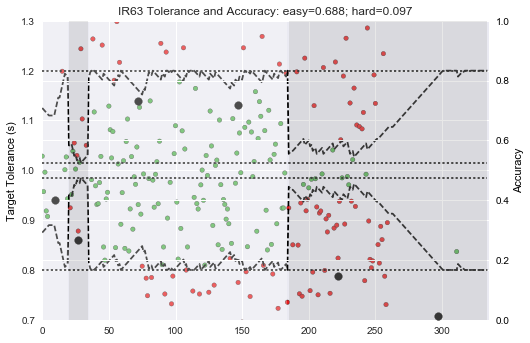

In [20]:
# Accuracy and Tolerance
f, ax1 = plt.subplots()
x = range(len(data))
plot_title = '{0} Tolerance and Accuracy: easy={1:0.3f}; hard={2:0.3f}'.format(
                SBJ, data[data['Condition']=='easy']['Hit'].mean(),
                data[data['Condition']=='hard']['Hit'].mean())
    
colors = [[float(c)/255 for c in [228,26,28]],   # green
          [float(c)/255 for c in [77,175,74]]]   # red (blue = [c/255 for c in [55,126,184]]})
rt_colors = [colors[data['Hit'].values[ix]] for ix in range(len(data))]
diff_colors = {'easy': [1,1,1],
               'hard': [0.7,0.7,0.7]}
#scale = {'Hit Total': np.max(data['Tolerance'])/np.max(data['Hit Total']),
#         'Score Total': np.max(data['Tolerance'])/np.max(data['Score Total'])}

# RTs
ax1.scatter(x,data['RT'], s=20, c=rt_colors, edgecolors='k')
# Tolerance
ax1.plot(prdm_vars['timing']['target']+data['Tolerance'],'k--',label='Tolerance')
ax1.plot(prdm_vars['timing']['target']-data['Tolerance'],'k--')
# Tolerance Limit
ax1.plot(x,[prdm_vars['timing']['target']-prdm_vars['timing']['tol_lim'][0] for _ in x],'k:')
ax1.plot(x,[prdm_vars['timing']['target']+prdm_vars['timing']['tol_lim'][0] for _ in x],'k:')
ax1.plot(x,[prdm_vars['timing']['target']-prdm_vars['timing']['tol_lim'][1] for _ in x],'k:')
ax1.plot(x,[prdm_vars['timing']['target']+prdm_vars['timing']['tol_lim'][1] for _ in x],'k:')
# Labels
ax1.set_ylabel('Target Tolerance (s)', color='k')
ax1.set_xlim([0,len(data)])
ax1.set_ylim([0.7, 1.3])#[min(data['RT']), max(data['RT'])])

ax2 = ax1.twinx()
# ax2.plot(data['Hit Total']/np.max(data['Hit Total']),'k',label='Hit Total')
ax2.scatter(block_mid_ix, accuracy, s=60, c='k',
           edgecolors='k')#,linewidths=2)
ax2.fill_between(x, 1, 0, where=data['Condition']=='easy',
                facecolor=diff_colors['easy'], alpha=0.3, label='hard')
ax2.fill_between(x, 1, 0, where=data['Condition']=='hard',
                facecolor=diff_colors['hard'], alpha=0.3, label='easy')
ax2.set_ylabel('Accuracy', color='k')
ax2.tick_params('y', colors='k')
ax2.set_xlabel('Trials')
ax2.set_xlim([0,len(data)])
ax2.set_ylim([0, 1])

plt.title(plot_title)

plt.savefig(results_dir+'tolerance_plots/'+SBJ+'_tolerance_plot_singletrial'+fig_type)

## RT Histogram

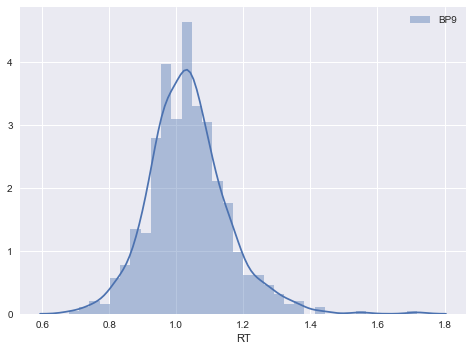

In [28]:
ax = sns.distplot(data['RT'],label=SBJ)
plt.subplots_adjust(top=0.9)
ax.legend() # can also get the figure from plt.gcf()
plt.savefig(results_dir+'RT_plots/'+SBJ+'_RT_hist'+fig_type)

## RT by post-error across conditions (post-novelty slowing)

In [29]:
# Label post-correct (PC), post-error (PE) trials
data['post-err'] = [False for _ in range(len(data))]
for ix in range(len(data)):
    # Exclude training data and first trial of the block
    if (data.loc[ix,'Block']!=-1) and (data.loc[ix,'Trial']!=0):
        if data.loc[ix-1,'Hit']==0:
            data.loc[ix,'post-err'] = True

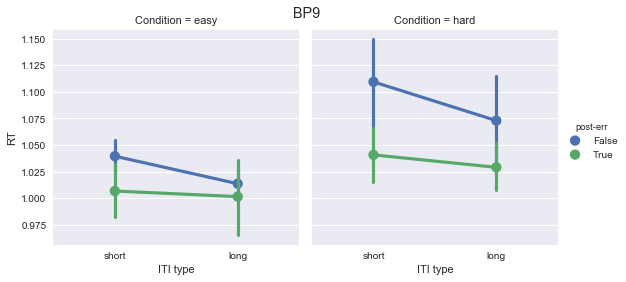

In [31]:
# RTs by condition
plot = sns.factorplot(data=data,x='ITI type',y='RT',hue='post-err',col='Condition',kind='point',
               ci=95,order=ITI_plot_order);
plt.subplots_adjust(top=0.9)
plot.fig.suptitle(SBJ) # can also get the figure from plt.gcf()

plt.savefig(results_dir+'RT_plots/'+SBJ+'_RT_PE_ITI_hit'+fig_type)

## post-long vs. post-short RT adjustments

In [52]:
# Break kdown by post-long and post-short trials
data['postlong'] = [False if ix==0 else True if data.loc[ix-1,'RT']>1 else False for ix in range(len(data))]
data_PL = data[data['postlong']==True]
data_PS = data[data['postlong']==False]

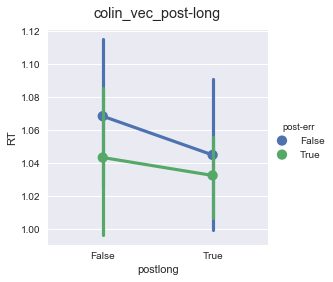

In [53]:
# Simple collapsed post-long vs post-short
plot = sns.factorplot(data=data,x='postlong',y='RT',kind='point',hue='post-err',
               ci=95);#,order=['short','medium','long']);
plt.subplots_adjust(top=0.9)
plot.fig.suptitle(SBJ+'_post-long') # can also get the figure from plt.gcf()

# # plt.savefig(results_dir+'RT_plots/'+SBJ+'_RT_PE_ITI_hit'+fig_type)
# plot2 = sns.factorplot(data=data_PS,x='ITI type',y='RT',hue='post-err',col='Condition',kind='point',
#                ci=95);#,order=['short','medium','long']);
# plt.subplots_adjust(top=0.9)
# plot2.fig.suptitle(SBJ+'_post-short') # can also get the figure from plt.gcf()

plt.savefig(results_dir+'RT_plots/'+SBJ+'_RT_postlong_posterr'+fig_type)

In [54]:
data['RT'].mean()

1.0426281488846156

### more detailed breakdown

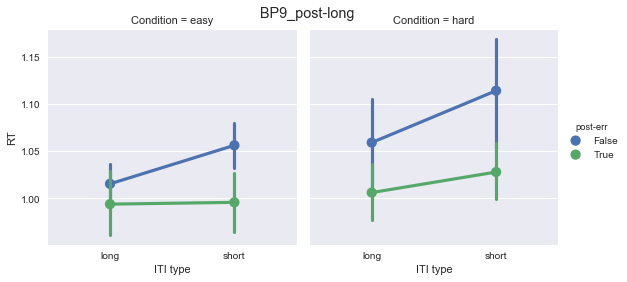

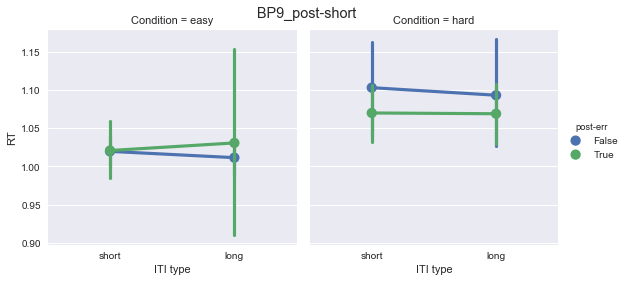

In [27]:
plot = sns.factorplot(data=data_PL,x='ITI type',y='RT',hue='post-err',col='Condition',kind='point',
               ci=95);#,order=['short','medium','long']);
plt.subplots_adjust(top=0.9)
plot.fig.suptitle(SBJ+'_post-long') # can also get the figure from plt.gcf()

# plt.savefig(results_dir+'RT_plots/'+SBJ+'_RT_PE_ITI_hit'+fig_type)
plot2 = sns.factorplot(data=data_PS,x='ITI type',y='RT',hue='post-err',col='Condition',kind='point',
               ci=95);#,order=['short','medium','long']);
plt.subplots_adjust(top=0.9)
plot2.fig.suptitle(SBJ+'_post-short') # can also get the figure from plt.gcf()

# plt.savefig(results_dir+'RT_plots/'+SBJ+'_RT_PE_ITI_hit'+fig_type)

In [29]:
data['RT'].mean()

1.0353009806589906

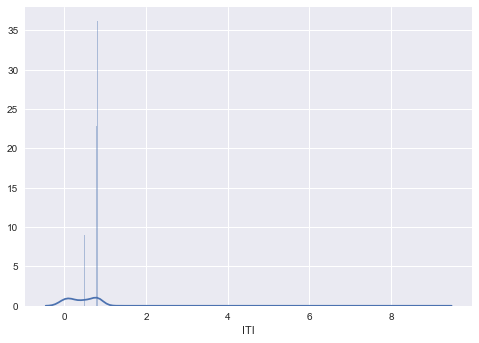

In [17]:
# ITI Histograms
sns.distplot(data['ITI'],bins=np.arange(0.285,1.01,0.01))

# OLD SHIT

In [ ]:
RT_means = {'short': np.empty(2),
           'medium': np.empty(2),
           'long': np.empty(2)}
RT_cnt = {'short': np.empty(2),
           'medium': np.empty(2),
           'long': np.empty(2)}
for ITI_type in ['short','medium','long']:
    RT_means[ITI_type][0] = data.loc[(data['PE']==False) & (data['ITI type']==ITI_type),'RT'].mean()
    RT_cnt[ITI_type][0] = sum([(data['PE']==False) & (data['ITI type']==ITI_type)]).sum()
    RT_means[ITI_type][1] = data.loc[(data['PE']==True) & (data['ITI type']==ITI_type),'RT'].mean()
    RT_cnt[ITI_type][1] = sum([(data['PE']==True) & (data['ITI type']==ITI_type)]).sum()
    
# print(ITI_type)
# print('PE: ',data.loc[data['PE']==True,'RT'].mean(),sum(data['PE']==True))
# print('PC: ',data.loc[data['PE']==False,'RT'].mean(),sum(data['PE']==False))

In [ ]:
def makeECDF(sample):
    def ECDF(x):
        N = len(sample)
        cumsum = sample<=x
        CDF = np.sum(cumsum)/N
        return CDF
    return ECDF

ecdf = makeECDF(sample)
xs = np.linspace(0,1,len(sample))
ys = [ecdf(x) for x in xs]
plt.plot(xs,ys)
sns.distplot(sample,rug=True,hist=False,kde=False)

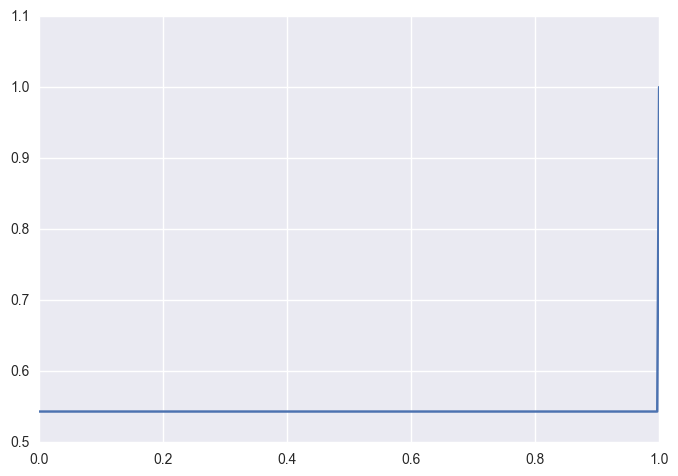

In [43]:
def makeECDF(sample):
    def ECDF(x):
        N = len(sample)
        cumsum = sample<=x
        CDF = np.sum(cumsum)/N
        return CDF
    return ECDF

ecdf = makeECDF(data['Correct'])
xs = np.linspace(0,1,len(data))
ys = [ecdf(x) for x in xs]
plt.plot(xs,ys)


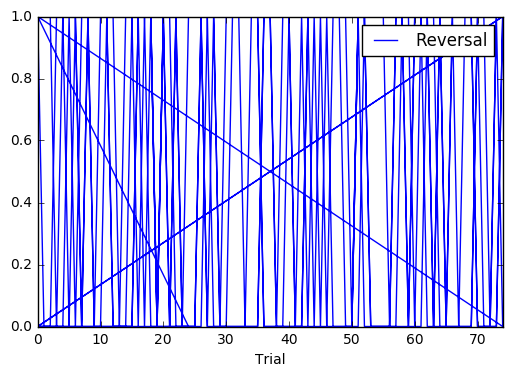

In [9]:
data.plot(x='Trial',y='Reversal')

In [22]:
n_blocks = 2
np.random.permutation([b for b in [0, 1] for _ in range(n_blocks)])

array([0, 1, 0, 1])